In [2]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt


###### Question a

# Antoine coefficients water
Aw = 8.07131
Bw =1730.63 
Cw =233.426 
# Antoine coefficients ethanol
Ae =7.68117 
Be =1332.04
Ce =199.200 
# Other constants
xe = 0.2    # Mole fraction of ethanol
xw = 0.8    # Mole fraction of water
P  = 755    # mm Hg

# Function to calculate temperature from vapor pressures
def fun(T):  # temperature T is the unknown we solve for
    
    # Antoine's law
    Pw_0 = 10**(Aw - Bw/(Cw + T))
    Pe_0 = 10**(Ae - Be/(Ce + T))
    
    # Raoult's law
    Pw = xw * Pw_0
    Pe = xe * Pe_0
    
    # Dalton's law
    P_tot = Pw + Pe
    
    # Equation we want to solve for:
    # Boiling point of a mixture -> when the total vapour pressure equals the atmospheric pressure
    f = P - P_tot 
    
    return f


# Choose an interval between the boiling point of ethanol (78) and water (100)
T_low = 78               # lower boundary of interval
T_high= 100              # upper boundary of interval

# Use the Bisection method to solve the equation. 
# Newton-Raphson also works, but then we have to provide the derivative of the equation
x = spo.bisect(fun, T_low, T_high, xtol=1e-15, maxiter=100)

print('Boiling temperature is {:.2f} oC'.format(x))


Boiling temperature is 93.70 oC


(85.0, 100.0)

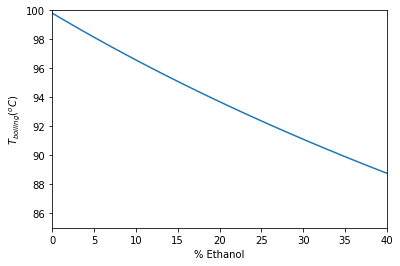

In [3]:
###### Question b

# Define an interval for values of xe
# 50 values taken from 0 to 0.4  (equally spaced)
xe_a = np.linspace(0, 0.4, 50) 

# Create an array to store the T solutions for each xe
T = np.zeros([50,1])       

# Solve the equation for all values of xe, one by one
for i, xe in enumerate(xe_a):
    xw   = 1 - xe
    T[i] = spo.bisect(fun, T_low, T_high, xtol=1e-15, maxiter=100)
    
  
# Make a plot with the found solutions T at different xe 
plt.figure()
plt.plot(xe_a*100, T)
plt.xlabel('% Ethanol')
plt.ylabel('$T_{boiling} (^oC)$')
plt.xlim([0, 40])
plt.ylim([85, 100])
